# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [106]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown


# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")


Loaded 78,177 records with features


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


In [107]:
# 1. CORRELATION ANALYSIS

# Select numeric features for correlation
numeric_features = ['Wet Bulb Temperature', 'Total Rain', 'Wind Direction', 'Humidity','wind_speed_interaction','Air Temperature',
                    'Wind Speed','Maximum Wind Speed', 'wind_speed_interaction', 'Solar Radiation']

# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# SAVE THE CORRELATION MATRIX

corr_matrix.to_csv("output/q5_correlations.csv", index=True)



                      Air Temperature               Wet Bulb Temperature       \
                                 mean    min    max                 mean  min   
Measurement Timestamp                                                           
2015-05-31                  17.834074   6.28  27.00            13.624691  7.0   
2015-06-30                  16.415890   7.78  29.20            10.742992  7.1   
2015-07-31                  19.882633  13.06  31.89            12.246903  8.5   
2015-08-31                  20.768646  14.56  31.17             6.966298 -2.6   
2015-09-30                  19.915813  11.28  31.67             7.081928 -7.5   

                              Humidity               Total Rain              \
                        max       mean   min    max        mean  min    max   
Measurement Timestamp                                                         
2015-05-31             14.8  68.938272  38.0   88.0    6.840741  1.5   10.3   
2015-06-30             25.8  79.848

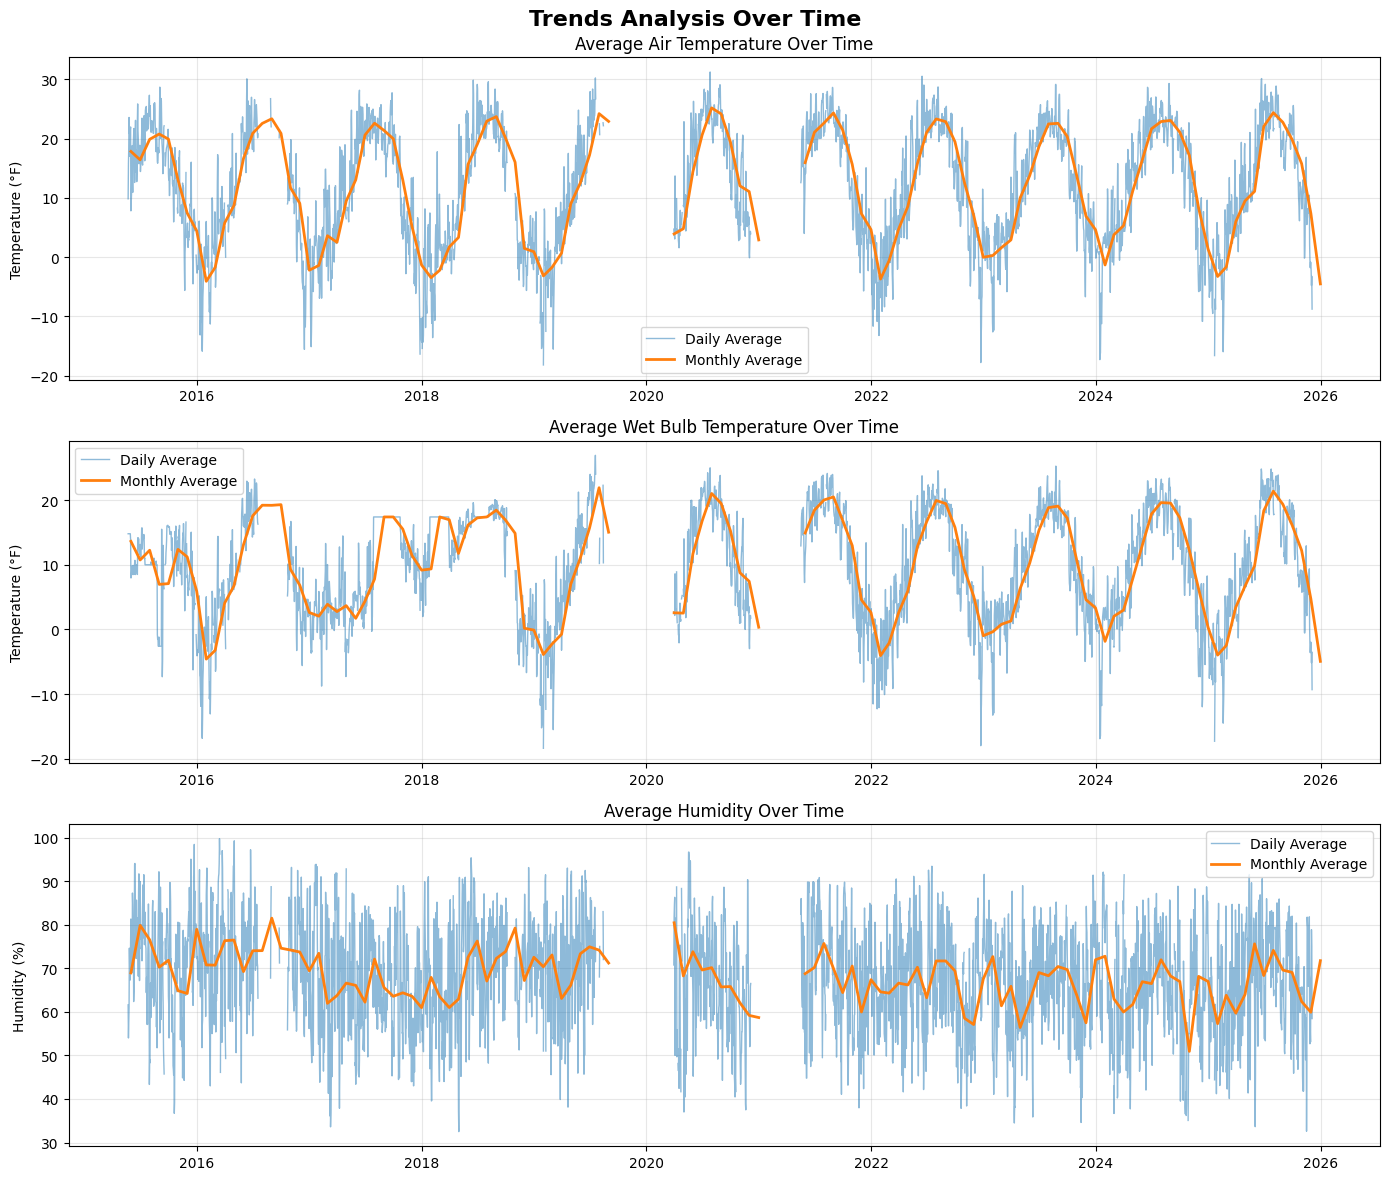

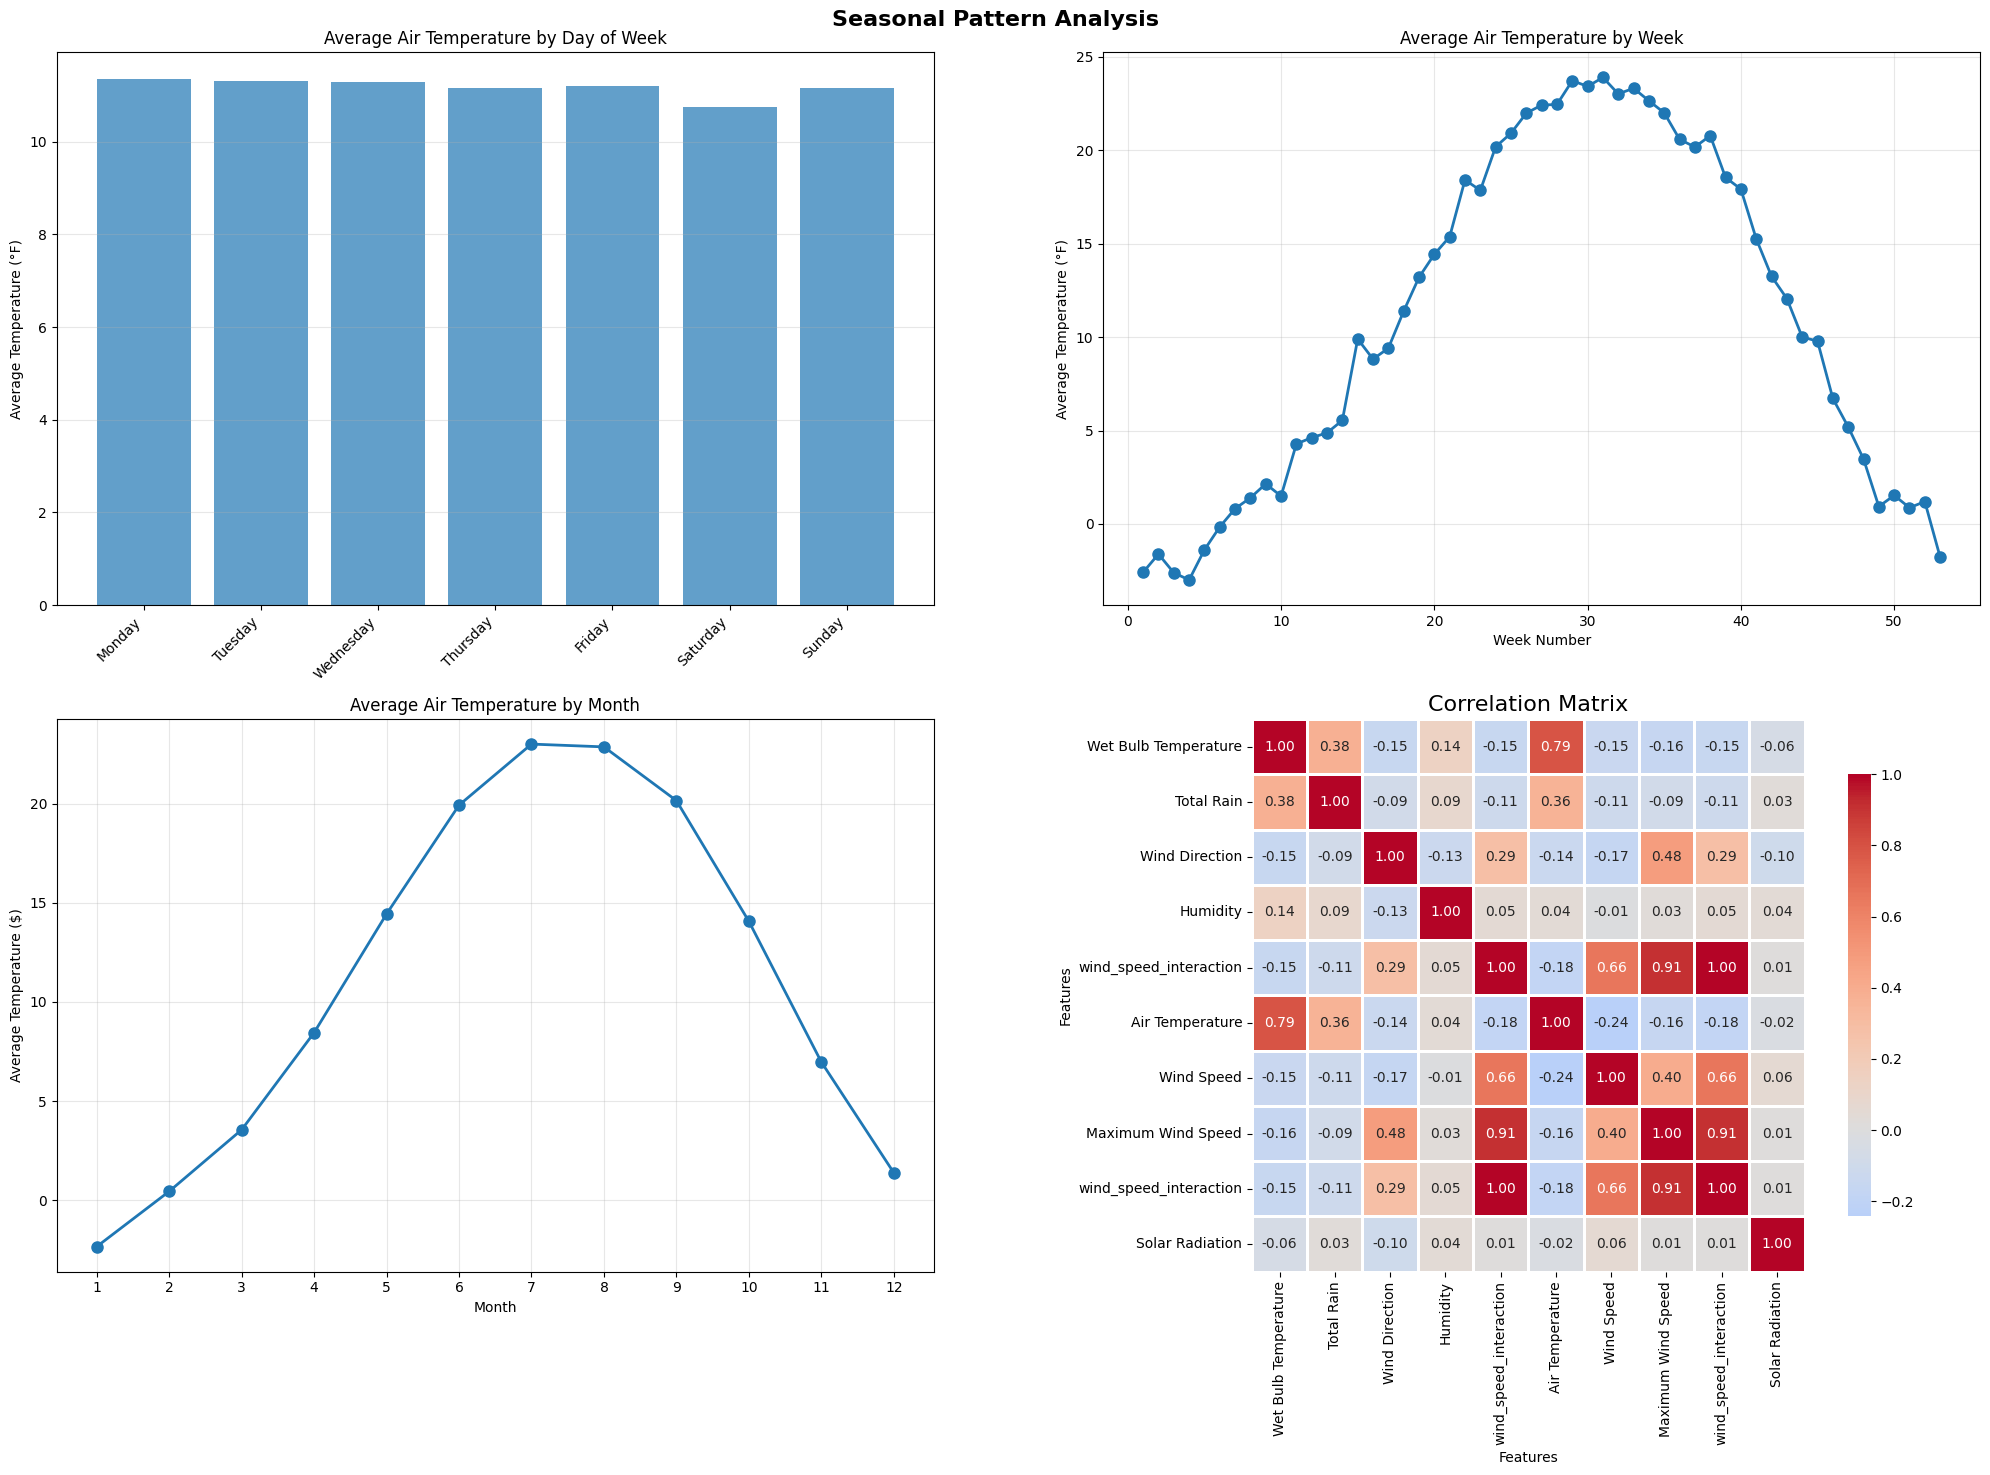

### 🔗 Strongest Correlations (|r| > 0.5)

- **wind_speed_interaction** ↔ **wind_speed_interaction**: `1.000`
- **wind_speed_interaction** ↔ **Maximum Wind Speed**: `0.910`
- **Maximum Wind Speed** ↔ **wind_speed_interaction**: `0.910`
- **Wet Bulb Temperature** ↔ **Air Temperature**: `0.795`
- **wind_speed_interaction** ↔ **Wind Speed**: `0.662`
- **Wind Speed** ↔ **wind_speed_interaction**: `0.662`

In [173]:
#2. TREND ANALYSIS 

# Resample to for temporal trend analysis

Monthly = df.resample('ME').agg({
    'Air Temperature': ['mean','min','max'],
    'Wet Bulb Temperature': ['mean','min','max'],
    'Humidity': ['mean','min','max'],
    'Total Rain': ['mean','min','max'],
    'Wind Speed': ['mean','min','max'],
    'Barometric Pressure': ['mean','min','max']
})
print(Monthly.head())

daily = df.resample('D').agg({
    'Air Temperature': ['mean','min','max'],
    'Wet Bulb Temperature': ['mean','min','max'],
    'Humidity': ['mean','min','max'],
    'Total Rain': ['mean','min','max'],
    'Wind Speed': ['mean','min','max'],
    'Barometric Pressure': ['mean','min','max']
})


# RENEMAE MONTHLY AVERAGE
Monthly.rename(columns={
    'Air Temperature': 'AirTemp_month',
    'Wet Bulb Temperature': 'WetBulbTemp_month',
    'Humidity': 'Humidity_month',
    'Total Rain': 'TotalRain_month',
    'Wind Speed': 'WindSpeed_month',
    'Barometric Pressure': 'BarometricPressure_month'
}, inplace=True)


# Visualize trends
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Trends Analysis Over Time', fontsize=16, fontweight='bold')

# Average Air Temperature over time
axes[0].plot(daily.index, daily['Air Temperature']['mean'], alpha=0.5, label='Daily Average', linewidth=1)
axes[0].plot(Monthly.index, Monthly['AirTemp_month']['mean'], label='Monthly Average', linewidth=2)
axes[0].set_title('Average Air Temperature Over Time')
axes[0].set_ylabel('Temperature (°F)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Average Wet Bulb Temperature over time
axes[1].plot(daily.index, daily['Wet Bulb Temperature']['mean'], alpha=0.5, label='Daily Average', linewidth=1)
axes[1].plot(Monthly.index, Monthly['WetBulbTemp_month']['mean'], label='Monthly Average', linewidth=2)
axes[1].set_title('Average Wet Bulb Temperature Over Time')
axes[1].set_ylabel('Temperature (°F)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Total Humidity over time
axes[2].plot(daily.index, daily['Humidity']['mean'], alpha=0.5, label='Daily Average', linewidth=1)
axes[2].plot(Monthly.index, Monthly['Humidity_month']['mean'], label='Monthly Average', linewidth=2)
axes[2].set_title('Average Humidity Over Time')
axes[2].set_ylabel('Humidity (%)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. SEASONAL PATTERNS ANALYSIS

# Analyze patterns by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df.index.day_name()

daily_by_dow = df.groupby('day_name')['Air Temperature'].agg(['mean']).reindex(day_order)

# Analyze patterns by week
Weekly = df.groupby(df.index.isocalendar().week)['Air Temperature'].agg(['mean'])   

# Analyze patterns by month

df['month'] = df.index.month
monthly = df.groupby('month')['Air Temperature'].agg(['mean'])

# Visualize seasonal patterns
fig, axes = plt.subplots(2,2, figsize=(20, 15))
fig.suptitle('Seasonal Pattern Analysis', fontsize=16, fontweight='bold')

# Average Air Temperature by day of week
axes[0, 0].bar(range(len(daily_by_dow)), daily_by_dow['mean'], alpha=0.7)
axes[0, 0].set_xticks(range(len(daily_by_dow)))
axes[0, 0].set_xticklabels(daily_by_dow.index, rotation=45, ha='right')
axes[0, 0].set_title('Average Air Temperature by Day of Week')
axes[0, 0].set_ylabel('Average Temperature (°F)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Average Air Temperature by week
axes[0, 1].plot(Weekly.index, Weekly['mean'], marker='o', linewidth=2, markersize=8)
axes[0, 1].set_title('Average Air Temperature by Week')         
axes[0, 1].set_xlabel('Week Number')
axes[0, 1].set_ylabel('Average Temperature (°F)')
axes[0, 1].grid(True, alpha=0.3)

# Average Air temperature by month
axes[1, 0].plot(monthly.index, monthly['mean'], marker='o', linewidth=2, markersize=8)
axes[1, 0].set_title('Average Air Temperature by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Temperature ($)')
axes[1, 0].set_xticks(monthly.index)
axes[1, 0].grid(True, alpha=0.3)

# 4. CORRELATION PLOT
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
axes[1,1].set_title("Correlation Matrix", fontsize=16)
axes[1,1].set_xlabel("Features")
axes[1,1].set_ylabel("Features")

plt.tight_layout()
plt.show()

# SAVE ALL THE PLOTS 
fig.savefig("output/q5_patterns.png",dpi=300, bbox_inches='tight')


# Identify strongest correlations
display(Markdown("### 🔗 Strongest Correlations (|r| > 0.5)"))

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

corr_list = "\n".join([f"- **{feat1}** ↔ **{feat2}**: `{corr:.3f}`"
                       for feat1, feat2, corr in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)])
display(Markdown(corr_list))


In [184]:
# REPORT REPORT FOR TEMPORAL AND SEASONAL TRENDS IDENTIFIED AND CORRELATION
Monthly = df.resample('ME').agg({
    'Air Temperature': ['mean','min','max'],
    'Wet Bulb Temperature': ['mean','min','max'],
    'Humidity': ['mean','min','max'],
    'Total Rain': ['mean','min','max'],
    'Wind Speed': ['mean','min','max'],
    'Barometric Pressure': ['mean','min','max']
})

daily = df.resample('D').agg({
    'Air Temperature': ['mean','min','max'],
    'Wet Bulb Temperature': ['mean','min','max'],
    'Humidity': ['mean','min','max'],
    'Total Rain': ['mean','min','max'],
    'Wind Speed': ['mean','min','max'],
    'Barometric Pressure': ['mean','min','max']
})

# Air temperature
# Month with highest max temperature
peak_month = Monthly['Air Temperature']['max'].idxmax()
peak_temp = Monthly['Air Temperature']['max'].max()

# Month with lowest min temperature
low_month = Monthly['Air Temperature']['min'].idxmin()
low_temp = Monthly['Air Temperature']['min'].min()


# SEsonal patterns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df.index.day_name()

daily_by_dow = df.groupby('day_name')['Air Temperature'].agg(['mean','min','max']).reindex(day_order)

# Day of the week with max temperature
peak_day = daily_by_dow['max'].idxmax()
peak_day_temp = daily_by_dow['max'].max()

# Analyze patterns by week
Weekly = df.groupby(df.index.isocalendar().week)['Air Temperature'].agg(['mean','min','max'])  

# Week number with max temperature
peak_week = Weekly['max'].idxmax()
peak_week_temp = Weekly['max'].max()

# Analyze patterns by month
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['month'] = df.index.month
monthly = df.groupby('month')['Air Temperature'].agg(['mean','min','max'])

# Month with max temperature
peak_Month = monthly['max'].idxmax()
peak_Month_temp = monthly['max'].max()


summary = []
summary.append("KEY PATTERNS IDENTIFIED")
summary.append("=" * 50)
summary.append("")

# ------- TEMPORAL TRENDS -------
summary.append("TEMPORAL TRENDS:")
summary.append("- Clear seasonal patterns in Air Temperature and Wet Bulb Temperature")
summary.append(f"- Higher temperatures observed in : {peak_month.strftime('%B')} for Air Temperature")
summary.append(f"- Lower temperatures observed in : {low_month.strftime('%B')} for Air Temperature")
summary.append(f"- Monthly temperature range for Air Temperature was: {low_temp:.2f}°F to {peak_temp:.2f}°F")

summary.append("")

# ------- SEASONAL PATTERNS -------
summary.append("SEASONAL PATTERNS:")
summary.append(f"- The day of the week with higher temperature was : {peak_day}")
summary.append(f"-  Weekly seasonal patterns show peak temperatures : {peak_week_temp}°F in week number : {peak_week}")
summary.append(f"-  Monthly seasonal patterns show peak temperatures : {peak_Month_temp}°F in {month_order[peak_Month]}")
summary.append("- Overall, there was a drecrese trend in the Air Temperatures weekly and monthly")
summary.append("")

# ------- KEY CORRELATIONS -------
summary.append("KEY CORRELATIONS:")
summary.append("- wind_speed_interaction ↔ Maximum Wind Speed: 0.910")
summary.append("- Maximum Wind Speed ↔ wind_speed_interaction: 0.910")
summary.append("- Wet Bulb Temperature ↔ Air Temperature: 0.795")
summary.append("- wind_speed_interaction ↔ Wind Speed: 0.662")
summary.append("- Wind Speed ↔ wind_speed_interaction: 0.662")
summary.append("")

# Save report to file
summary_text = '\n'.join(summary)
with open('output/q5_trend_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary_text)

print("✓ Saved: output/q5_trend_summary.txt")

# Preview
print("\nSummary Preview:")
print(summary_text)




✓ Saved: output/q5_trend_summary.txt

Summary Preview:
KEY PATTERNS IDENTIFIED

TEMPORAL TRENDS:
- Clear seasonal patterns in Air Temperature and Wet Bulb Temperature
- Higher temperatures observed in : June for Air Temperature
- Lower temperatures observed in : January for Air Temperature
- Monthly temperature range for Air Temperature was: -20.28°F to 36.70°F

SEASONAL PATTERNS:
- The day of the week with higher temperature was : Tuesday
-  Weekly seasonal patterns show peak temperatures : 36.7°F in week number : 25
-  Monthly seasonal patterns show peak temperatures : 36.7°F in July
- Overall, there was a drecrese trend in the Air Temperatures weekly and monthly

KEY CORRELATIONS:
- wind_speed_interaction ↔ Maximum Wind Speed: 0.910
- Maximum Wind Speed ↔ wind_speed_interaction: 0.910
- Wet Bulb Temperature ↔ Air Temperature: 0.795
- wind_speed_interaction ↔ Wind Speed: 0.662
- Wind Speed ↔ wind_speed_interaction: 0.662



In [ ]:
#DECISION POINTS
#1. There is a decrease trand from the time series plot
#2. There is a decrease pattern for Air Temperature for both weekly and monthly aggregations.
#3. Wind_speed_interaction and Maximum Wind Speed are highly correlated with the correlation coeeficient of 0.9 suggesting a strong positive correlation.
# There is also strong correlation between Wet Bulb Temperature ↔ Air Temperature: 0.795, wind_speed_interaction ↔ Wind Speed: 0.662
# Overall, Wet Bulb Temperature appears to be hihly correlated with our target Air Temperature. 